In [2]:
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
x = df.drop('math score',axis=1)

In [4]:
y = df['math score']

In [ ]:
numerical = x.select_dtypes(exclude='object').columns
catergorical = x.select_dtypes(include='object').columns
## Here we splitted out numerical and categorical features 

In [6]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
# A tool that allows you to apply different preprocessing and feature extraction pipelines to different subsets of features (columns) within your dataset. 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [ ]:
scaler = StandardScaler()
onehot = OneHotEncoder()

## Columns transformer is used to transform our columns or datapoints 
preprocessor = ColumnTransformer(
    [   
        ("OneHotEncoder",onehot,catergorical),
        ('StandardScaler',scaler,numerical),
    ]
)

## Here we created a pipeline in which we passed our numerical features and categorical features 

In [8]:
x = preprocessor.fit_transform(x)

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression(fit_intercept=True)
model = model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
score = r2_score(ytest,ypred)*100
print("Accuracy of model is {}".format(round(score,2)))

Accuracy of model is 88.04


Text(0, 0.5, 'Predicted')

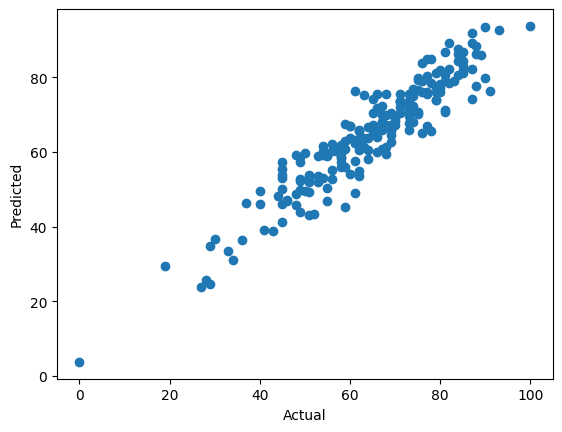

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.scatter(ytest,ypred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

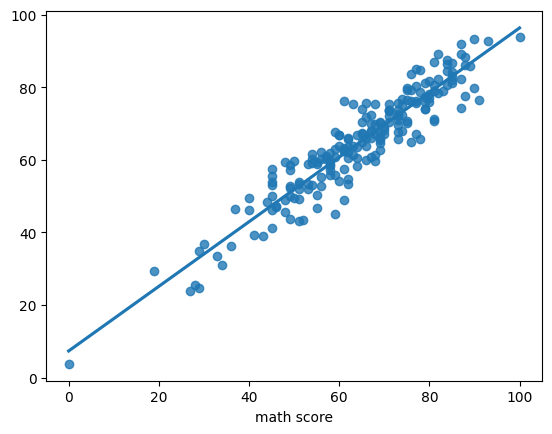

In [12]:
sns.regplot(x=ytest,y=ypred,ci=None)

In [31]:
columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score']
for i in columns:
    print(f"{i} : ",df[i].unique(),end="\n\n")

gender :  ['female' 'male']

race/ethnicity :  ['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch :  ['standard' 'free/reduced']

test preparation course :  ['none' 'completed']

math score :  [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]

reading score :  [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]

writing score :

In [40]:
# names = ['siddant']
# number = ['sd']

# new_list = pd.DataFrame(list(zip(names,number)),columns=['names','number'])
# new_list